# Programming for Data Analysis Project 2019

![Image](Images/pythonpandas.JPG "Image")


## Problem Statement

Create a dataset by simulating a real-word phenomenon. Rather than collect data associated with the choosen real-world phenomenon the data should be modeled and synthesise the data using Python **numpy.randon** package



## Real World Phenomenon

The real world phenomenon we will be simulating is the Irish Emergency Call Answering Service (ECAS). This is a 24hr 365 day a year call centre that answers emergency calls 112 or 999. 

When 112 or 999 is dialed from any PSTN phone in Ireland the call will be put through to an emergency front line operator in the ECAS call centre. The caller is then given the following options 

1. Garda 
2. Fire 
3. Ambulance
4. Coast Guard 

Depending on the emergency the front line operator puts the call through to the appropiate emergency service, they continue to monitor the call until the emergency service takes responsibility for the call and responding to the emergency.

They are also responsible for taking the location of the emergency call.

From the call statistics published on the department of communications website the ECAS service answered over 1.8 million calls in 2017. This over 200 calls per hour. The average duration of calls were 7.57 secs 

References: 
https://www.dccae.gov.ie/en-ie/news-and-media/press-releases/Pages/Minister-Denis-Naughten-Publishes-New-Figures-on-Ireland%E2%80%99s-Emergency-Call-Answering-Service.aspx

## Variables

To simulate the ECAS call centre we will use Python **numpy.random** package The call centre will have the following variables and is open 24 hours 7 days a week and 365 days of the year.

The first variable is a timeseries variable called **period** this will consist of a time period of one week in hourly intervals. This will give 145 rows in the Dataframe or dataset. 

1. period
2. garda
3. fire
4. ambulance
5. coast_guard
6. total_calls

To simulate the calls to the ECAS call center Numpy random.poisson distribution is used, garda, fire, ambulance and coast_guard calls all use Numpy random.poisson distrbution

The total_calls variable is a sum total of calls for garda, fire, ambulance and coast_guard.

References: 
https://en.wikipedia.org/wiki/Poisson_distribution


## Building the Dataframe

### Importing Python Packages

The first step is to import the following Python packages. Numpy is imported to give the numpy random packages to simulate data for the dataset. Pandas constructs the actual dataframe consisting of rows and columns. Matplotlib.pyplot and seaborn are imported as graphic libraries to generate plots from the simulated data.

In [1]:
#The following Python packages are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Defining the sampling start, end and frequency

Once the packages Python packages are imported the first step is to define 


In [2]:
# The period of a week is choosen starting from the 1st January 2019, 
# the week is divided up in to hourly periods given 145 data points for the week.

period =  pd.date_range('01-01-2017', '01-07-2017', freq='H')

#Reference: 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
#https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [3]:
#period datetime index is printed out, the data type is datetime64 
period

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-06 15:00:00', '2017-01-06 16:00:00',
               '2017-01-06 17:00:00', '2017-01-06 18:00:00',
               '2017-01-06 19:00:00', '2017-01-06 20:00:00',
               '2017-01-06 21:00:00', '2017-01-06 22:00:00',
               '2017-01-06 23:00:00', '2017-01-07 00:00:00'],
              dtype='datetime64[ns]', length=145, freq='H')

### Defining ecas_garda dataframe

The ecas_garda pandas dataframe is defined to capture garda emergency calls to the ECAS call centre for the period defined in the previous section, the ecas_garda dataframe consists of the datetime column and a Numpy random.poisson distribution for garda emergency calls, the poisson distrbution's $\lambda$ is also a random integer.

Defining the ecas_garda dataframe consists of two steps.

1. Define the poisson distrbution's $\lambda$ as a random integer
2. Define the calls column as a Numpy **random.poisson** distrbution of the entire time period

References:https://www.calvin.edu/~rpruim/courses/s341/S17/from-class/MathinRmd.html


In [4]:
#Define a random integer for the Poisson distrubution lamda value for calls for a garda emergency. 
#The random integer number is anywhere in the range of 45 to 185 calls per hour, this is a random range choosen.

#The np.random.seed is used so that each run the same number is generated for lambda

np.random.seed(1)
garda_randomint = np.random.randint(45, 185)

#The random integer is printed out below
garda_randomint

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

82

Construct the **ecas_garda** dataframe using the **period** variable and label this column datetime. This dataframe will have the same number of rows as the period variable. The next line of code adds the **garda** column on to the new dataframe **ecas_garda** using a Numpy **random.poisson** function in Python. The resulting pandas dataframe has two columns, **datetime** and **garda**.

In [5]:
#The np.random.seed is used so that each run the same values are generated on the poisson distribution
#ecas_garda pandas Dataframe is constructed first with the period to produce a timeseries column of type timeseries labeling it 'datetime'
#The datetime column is not an index to the dataframe and therefore can be in either the x or y axis of the plots.
#The column garda is added on to the new dataframe using Numpy random.poisson distrbution function.
#THe first 5 rows of the new dataframe is printed out.



np.random.seed(1)
ecas_garda = pd.DataFrame(period, columns=['datetime'])
ecas_garda['garda'] = np.random.poisson(garda_randomint, len(period))
ecas_garda.head()

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

,datetime,garda
0,2017-01-01 00:00:00,80
1,2017-01-01 01:00:00,71
2,2017-01-01 02:00:00,73
3,2017-01-01 03:00:00,79
4,2017-01-01 04:00:00,80


In [6]:
#This command verifies the data types in the ecas_garda dataframe. 
#The result is a datetime64 columns and an 32 bit integer column

ecas_garda.dtypes

#References:https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.datetime.html

datetime    datetime64[ns]
garda                int32
dtype: object

### Defining ecas_fire dataframe

Again the ecas_fire pandas dataframe is defined to capture fire emergency calls to the ECAS call centre for the period defined in the previous section, the ecas_fire dataframe consists of the datetime column and a Numpy random.poisson distribution for emergency calls for the fire service, the poisson distrbution's $\lambda$ is also a random integer.

Defining the ecas_fire dataframe consists of two steps.

1. Define the poisson distrbution's $\lambda$ as a random integer
2. Define the calls column as a Numpy **random.poisson** distrbution of the entire time period.

References:https://www.calvin.edu/~rpruim/courses/s341/S17/from-class/MathinRmd.html

In [7]:
#Define a random integer for the Poisson distribution lamda value for calls for a fire emergency. 
#The random integer number is anywhere in the range of 50 to 160 calls per hour, this is a random range choosen.
#The np.random.seed is used so that each run the same number is generated for lambda

np.random.seed(3)
fire_randomint = np.random.randint(50,160)

# The random integer is printed out.
fire_randomint

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

156

Construct the **ecas_fire** dataframe using the **period** variable and label this column datetime. This dataframe will have the same number of rows as the period variable. The next line of code adds the **fire** column on to the new dataframe **ecas_fire** using a Numpy **random.poisson** function in Python. The resulting pandas dataframe has two columns, **datetime** and **fire**.

In [8]:
#The np.random.seed is used so that each run the same values are generated on the poisson distrbution
#ecas_fire pandas Dataframe is constructed first with the period to produce a timeseries column of type timeseries labeling it 'datetime'
#The datetime column is not an index to the dataframe and therefore can be in either the x or y axis of the plots.
#The column fire is added on to the new dataframe using Numpy random.poisson distrbution function.
#The first 5 rows of the new dataframe is printed out.


np.random.seed(1)
ecas_fire = pd.DataFrame(period, columns=['datetime'])
ecas_fire['fire'] = np.random.poisson(fire_randomint, len(period))
ecas_fire.head()

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

,datetime,fire
0,2017-01-01 00:00:00,153
1,2017-01-01 01:00:00,141
2,2017-01-01 02:00:00,143
3,2017-01-01 03:00:00,152
4,2017-01-01 04:00:00,153


In [9]:
#This command verifies the data types in the ecas_fire dataframe. 
#The result is a datetime64 columns and an 32 bit integer column

ecas_fire.dtypes

#References:https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.datetime.html

datetime    datetime64[ns]
fire                 int32
dtype: object

### Defining ecas_ambulance dataframe

The ecas_ambulance pandas dataframe is defined to capture ambulance emergency calls to the ECAS call centre for the period defined in the previous section, the ecas_ambulance dataframe consists of the datetime column and a Numpy random.poisson distribution for the ambulance calls, the poisson distrbution's $\lambda$ is also a random integer.

Defining the ecas_ambulance dataframe consists of two steps.

1. Define the poisson distrbution's $\lambda$ as a random integer
2. Define the calls column as a Numpy **random.poisson** distrbution of the entire time period.

References:https://www.calvin.edu/~rpruim/courses/s341/S17/from-class/MathinRmd.html

In [10]:
#Define a random integer for the Poisson distrubution lamda value for calls for a ambulance emergency call. 
#The random integer number is anywhere in the range of 35 to 270 calls per hour, this is a random range choosen.
#The np.random.seed is used so that each run the same number is generated for lambda

np.random.seed(7)
ambulance_randomint = np.random.randint(35,270)
ambulance_randomint

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

210

Construct the **ecas_ambulance** dataframe using the **period** variable and label this column datetime. This dataframe will have the same number of rows as the period variable. The next line of code adds the **ambulance** column on to the new dataframe **ecas_ambulance** using a Numpy **random.poisson** function in Python. The resulting pandas dataframe has two columns, **datetime** and **ambulance**.

In [11]:
#The np.random.seed is used so that each run the same values are generated on the poisson distribution
#ecas_ambulance pandas Dataframe is constructed first with the period to produce a timeseries column of type timeseries labeling it 'datetime'
#The datetime column is not an index to the dataframe and therefore can be in either the x or y axis of the plots.
#The column fire is added on to the new dataframe using Numpy random.poisson distrbution function.
#The first 5 rows of the new dataframe is printed out.

np.random.seed(1)
ecas_ambulance = pd.DataFrame(period, columns=['datetime'])
ecas_ambulance['ambulance'] = np.random.poisson(ambulance_randomint, len(period))
ecas_ambulance.head()

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

,datetime,ambulance
0,2017-01-01 00:00:00,206
1,2017-01-01 01:00:00,192
2,2017-01-01 02:00:00,195
3,2017-01-01 03:00:00,206
4,2017-01-01 04:00:00,207


In [12]:
#This command verifies the data types in the ecas_ambulance dataframe. 
#The result is a datetime64 columns and a 32 bit integer column

ecas_ambulance.dtypes

#References:https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.datetime.html

datetime     datetime64[ns]
ambulance             int32
dtype: object

### Defining ecas_coast_guard dataframe

The ecas_coast_guard pandas dataframe is defined to capture coast_guard emergency calls to the ECAS call centre for the period defined in the previous section, the ecas_coast_guard dataframe consists of the datetime column and a Numpy random.poisson distribution for emergency calls for the fire service, the poisson distrbution's $\lambda$ is also a random integer.

Defining the ecas_coast_guard dataframe consists of two steps.

1. Define the poisson distrbution's $\lambda$ as a random integer
2. Define the calls column as a Numpy **random.poisson** distrbution of the entire time period.

References:https://www.calvin.edu/~rpruim/courses/s341/S17/from-class/MathinRmd.html

In [13]:
#Define a random integer for the Poisson distribution lamda value for calls for a coast_guard emergency call.
#The random integer number is anywhere in the range of 30 to 265 calls per hour, this is a random range choosen.
#The np.random.seed is used so that each run the same number is generated for lambda

np.random.seed(13)
coast_guard_randomint = np.random.randint(30, 265)
coast_guard_randomint

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

112

Construct the **ecas_coast_guard** dataframe using the **period** variable and label this column datetime. This dataframe will have the same number of rows as the period variable. The next line of code adds the **coast_guard** column on to the new dataframe **ecas_coast_guard** using a Numpy **random.poisson** function in Python. The resulting pandas dataframe has two columns, **datetime** and **coast_guard**.

In [14]:
#The np.random.seed is used so that each run the same values are generated on the poisson distribution
#ecas_coast_guard pandas Dataframe is constructed first with the period to produce a timeseries column of type timeseries labeling it 'datetime'
#The datetime column is not an index to the dataframe and therefore can be in either the x or y axis of the plots.
#The column fire is added on to the new dataframe using Numpy random.poisson distrbution function.
#The first 5 rows of the new dataframe is printed out.

np.random.seed(1)
ecas_coast_guard = pd.DataFrame(period, columns=['datetime'])
ecas_coast_guard['coast_guard'] = np.random.poisson(coast_guard_randomint, len(period))
ecas_coast_guard.head()

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

,datetime,coast_guard
0,2017-01-01 00:00:00,109
1,2017-01-01 01:00:00,99
2,2017-01-01 02:00:00,101
3,2017-01-01 03:00:00,109
4,2017-01-01 04:00:00,109


In [15]:
#This command verifies the data types in the ecas_coast_guard dataframe. 
#The result is a datetime64 columns and a 32 bit integer column

ecas_coast_guard.dtypes

#References:https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.datetime.html

datetime       datetime64[ns]
coast_guard             int32
dtype: object

### Joining the dataframes together to make ecas dataframe

We now have the following four dataframes for calls to each of the respective emergency service

1. ecas_garda
2. ecas_fire
3. ecas_ambulance
4. ecas_coast_guard

Each of the dataframes above have the same **datetime** column. We will extract the calls column values from each dataframe and use them to define a new dataframe **ecas** and add a total_calls column to sum all calls to the ECAS call centre for the period defined. We can also still reference the individual dataframes to analyse each emergency calls category separately.

The first step in joining the pandas dataframes is to define a new dataframe ecas, then add the column values to the new dataframe. The ecas_garda dataframe is used to define the initial dataframe, note any of the four dataframe could have been used.

In [16]:
#Define the new dataframe to equal ecas_garda dataframe

ecas = ecas_garda

#Print the first 5 rows of the new ecas dataframe
ecas.head()


,datetime,garda
0,2017-01-01 00:00:00,80
1,2017-01-01 01:00:00,71
2,2017-01-01 02:00:00,73
3,2017-01-01 03:00:00,79
4,2017-01-01 04:00:00,80


The next few commands display the values in the columns that we want to add to the new pandas dataframe **ecas**.

In [17]:
# Creating an array of values from the Dataframe ecas_fire
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in

ecas_fire['fire'].values

array([153, 141, 143, 152, 153, 144, 153, 140, 149, 135, 142, 137, 187,
       163, 163, 148, 137, 176, 148, 145, 156, 159, 159, 137, 163, 128,
       162, 182, 175, 140, 152, 179, 166, 173, 166, 147, 153, 162, 154,
       153, 175, 149, 174, 176, 142, 180, 132, 164, 171, 158, 139, 159,
       158, 168, 168, 172, 158, 131, 126, 145, 158, 158, 146, 144, 146,
       160, 141, 133, 160, 159, 158, 162, 132, 161, 166, 147, 144, 157,
       147, 165, 160, 184, 177, 152, 160, 178, 152, 143, 140, 169, 143,
       140, 150, 159, 170, 154, 168, 156, 154, 149, 159, 167, 129, 160,
       159, 148, 166, 166, 172, 162, 152, 152, 160, 144, 150, 162, 146,
       157, 159, 157, 158, 150, 151, 163, 142, 150, 159, 177, 147, 144,
       165, 146, 153, 146, 156, 141, 158, 141, 145, 167, 149, 170, 169,
       137, 164])

In [18]:
# Creating an array of values from the Dataframe ecas_ambulance
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in

ecas_ambulance['ambulance'].values

array([206, 192, 195, 206, 207, 196, 206, 192, 202, 229, 186, 194, 188,
       246, 218, 218, 200, 188, 233, 201, 197, 210, 213, 214, 188, 218,
       177, 217, 241, 232, 192, 206, 236, 221, 230, 221, 200, 207, 217,
       190, 208, 206, 232, 202, 230, 233, 194, 237, 182, 219, 228, 212,
       191, 212, 224, 224, 228, 212, 181, 175, 197, 212, 213, 199, 196,
       198, 215, 193, 183, 214, 213, 212, 217, 182, 215, 221, 199, 196,
       211, 199, 220, 233, 215, 243, 234, 205, 214, 236, 206, 194, 191,
       226, 195, 191, 203, 213, 208, 224, 210, 207, 202, 213, 223, 179,
       218, 205, 214, 213, 201, 221, 221, 228, 217, 205, 206, 215, 196,
       203, 217, 199, 211, 213, 211, 213, 203, 205, 218, 194, 203, 214,
       234, 199, 196, 220, 199, 206, 198, 211, 193, 212, 192, 197, 223,
       202, 227])

In [19]:
# Creating an array of values from the Dataframe ecas_coast_guard
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in
ecas_coast_guard['coast_guard'].values

array([109,  99, 101, 109, 109, 102, 109,  99, 106, 126,  94,  96, 138,
       118, 118, 105,  96, 129, 105, 102, 112, 114, 115,  96, 118,  88,
       117, 134, 128,  99, 109, 131, 120, 127, 120, 104, 110, 117, 110,
       109, 128, 106, 127, 129, 100, 132,  92, 119, 125, 114,  98, 114,
       122, 122, 125, 114,  90,  86, 103, 114, 114, 104, 102, 103, 116,
       100,  92, 115, 114, 113, 117,  92, 116, 120, 104, 101, 113, 104,
       120, 136, 130, 109, 115, 131, 109, 101,  98, 123, 101,  98, 107,
       114, 111, 122, 112, 110, 106, 114, 122,  89, 108, 115, 114, 105,
       120, 120, 125, 117, 108, 109, 116, 102, 107, 126, 117, 104, 113,
       114, 113, 114, 107, 108, 118, 100, 107, 115, 104, 101, 119, 104,
       109, 103, 112,  99, 113,  99, 103, 122, 106, 124, 123,  96, 118,
       122, 121])

The next few commands below add in the extracted column values as a new column to the new dataframe **ecas**

In [20]:
# The command below adds the fire column values from the ecas_fire dataframe to the ecas dataframe and labels it fire
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in

ecas['fire'] = ecas_fire['fire'].values

#The new dataframe is printed
ecas.head()

,datetime,garda,fire
0,2017-01-01 00:00:00,80,153
1,2017-01-01 01:00:00,71,141
2,2017-01-01 02:00:00,73,143
3,2017-01-01 03:00:00,79,152
4,2017-01-01 04:00:00,80,153


In [21]:
# The command below adds the ambulance column values from the ecas_ambulance dataframe to the ecas dataframe and labels it ambulance
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in

ecas['ambulance'] = ecas_ambulance['ambulance'].values

#The new dataframe is printed
ecas.head()

,datetime,garda,fire,ambulance
0,2017-01-01 00:00:00,80,153,206
1,2017-01-01 01:00:00,71,141,192
2,2017-01-01 02:00:00,73,143,195
3,2017-01-01 03:00:00,79,152,206
4,2017-01-01 04:00:00,80,153,207


In [22]:
# The command below adds the coast_guard column values from the ecas_coast_guard dataframe to the ecas dataframe and labels it coiast_guard
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in

ecas['coast_guard'] = ecas_coast_guard['coast_guard'].values

#The new dataframe is printed
ecas.head()

,datetime,garda,fire,ambulance,coast_guard
0,2017-01-01 00:00:00,80,153,206,109
1,2017-01-01 01:00:00,71,141,192,99
2,2017-01-01 02:00:00,73,143,195,101
3,2017-01-01 03:00:00,79,152,206,109
4,2017-01-01 04:00:00,80,153,207,109


The column **total_calls** is defined as the sum of all the columns values for each hourly period. The columns summed to give **total_calls** are **garda**, **fire**, **ambulance**, and **coast_guard** 

In [23]:
# Sum columns garda, fire, ambulance, coast_guard to give a new column total_calls
# Reference: https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns/34023971

ecas['total_calls'] = ecas['garda'] + ecas['fire'] + ecas['ambulance'] + ecas['coast_guard']

#The first 5 rows of the new dataframe ecas is printed
ecas.head()

,datetime,garda,fire,ambulance,coast_guard,total_calls
0,2017-01-01 00:00:00,80,153,206,109,548
1,2017-01-01 01:00:00,71,141,192,99,503
2,2017-01-01 02:00:00,73,143,195,101,512
3,2017-01-01 03:00:00,79,152,206,109,546
4,2017-01-01 04:00:00,80,153,207,109,549


In [24]:
ecas['total_calls'].sum()

80753

In [25]:
ecas.dtypes

datetime       datetime64[ns]
garda                   int32
fire                    int32
ambulance               int32
coast_guard             int32
total_calls             int32
dtype: object

### Average Call Duration

The average ECAS call duration is 7.57 in 2017 according to the Department of environment website below.

There is another variable to be added to the ecas dataframe

1. total_avg_talk_time

Reference: 
https://www.dccae.gov.ie/en-ie/news-and-media/press-releases/Pages/Minister-Denis-Naughten-Publishes-New-Figures-on-Ireland%E2%80%99s-Emergency-Call-Answering-Service.aspx

In [43]:
#total_avg_talk_time is added to the ecas dataframe, this is the total_calls * the average call duration rounded up to 8 secs
ecas['total_avg_talk_time'] = ecas['total_calls'] * 8
ecas.head()



,datetime,garda,fire,ambulance,coast_guard,total_calls,total_avg_talk_time
0,2017-01-01 00:00:00,80,153,206,109,548,4384
1,2017-01-01 01:00:00,71,141,192,99,503,4024
2,2017-01-01 02:00:00,73,143,195,101,512,4096
3,2017-01-01 03:00:00,79,152,206,109,546,4368
4,2017-01-01 04:00:00,80,153,207,109,549,4392


## Analysing the Dataset

In this section the dataset that was simulated in the previous section will be analysed. 


In [46]:
# The command below gives a summary statics on the dataframe.

ecas.describe()

,garda,fire,ambulance,coast_guard,total_calls,total_avg_talk_time
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,81.427586,155.151724,208.986207,111.351724,556.917241,4455.337931
std,9.178587,12.639407,14.712516,10.722854,29.267327,234.138617
min,60.000000,126.000000,175.000000,86.000000,484.000000,3872.000000
25%,75.000000,146.000000,198.000000,104.000000,539.000000,4312.000000
50%,82.000000,156.000000,210.000000,112.000000,555.000000,4440.000000
75%,87.000000,163.000000,218.000000,118.000000,574.000000,4592.000000
max,104.000000,187.000000,246.000000,138.000000,629.000000,5032.000000


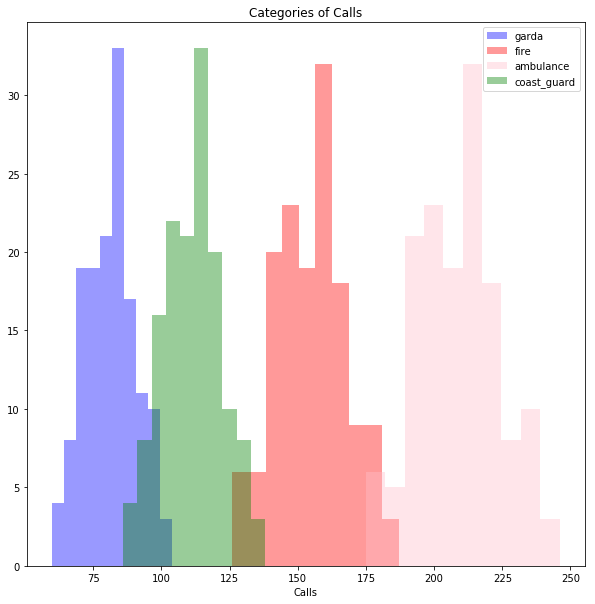

In [47]:
# The four categories are plotted on one Seaborn histogram plot, each call category is coloured.
plt.rcParams['figure.figsize'] = (10, 10)
sns.distplot(ecas['garda'], hist=True, kde=False, label = 'garda' , color='blue')
sns.distplot(ecas['fire'], hist=True, kde=False, label = 'fire' , color='red')
sns.distplot(ecas['ambulance'], hist=True, kde=False, label = 'ambulance' , color='pink')
sns.distplot(ecas['coast_guard'], hist=True, kde=False, label = 'coast_guard' , color='green')
plt.title("Categories of Calls")
plt.xlabel('Calls')
plt.ylabel('')
plt.legend()
plt.show()


From the histogram above the spread of calls between the different emergency categories can be seen.

Seed values were introduced to keep the values the same for notebook

The histogram matches the descritive stats of the ecas dataframe. In this example the average number of calls for each caegory were as follows

* garda = 81
* fire = 155
* ambulance = 209
* coast_guard = 111

This data matches the histogram peak bin values above.

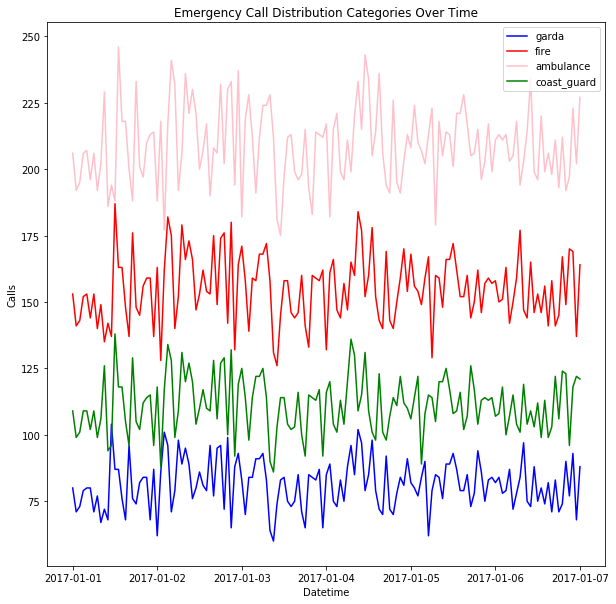

In [48]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.lineplot(x="datetime", y="garda", data=ecas, label = 'garda' , color='blue')
sns.lineplot(x="datetime", y="fire", data=ecas, label = 'fire' , color='red')
sns.lineplot(x="datetime", y="ambulance", data=ecas, label = 'ambulance' , color='pink')
sns.lineplot(x="datetime", y="coast_guard", data=ecas, label = 'coast_guard' , color='green')
plt.title("Emergency Call Distribution Categories Over Time")
plt.xlabel("Datetime")
plt.ylabel("Calls")
plt.legend()
plt.show()

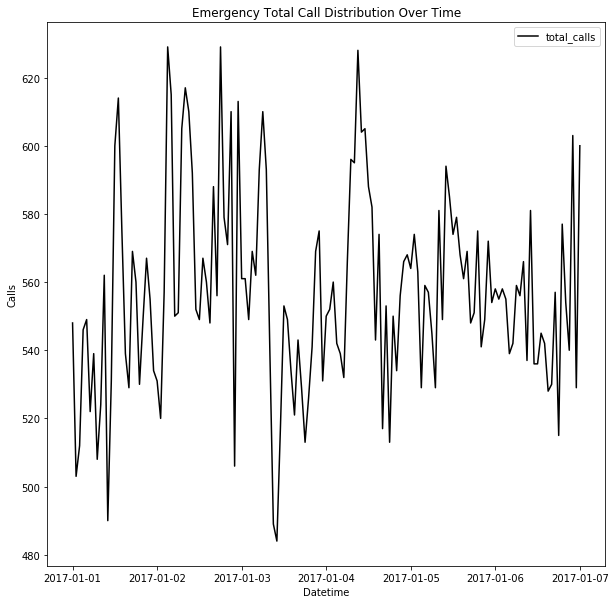

In [49]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.lineplot(x="datetime", y="total_calls", data=ecas, label = 'total_calls' , color='black')
plt.title("Emergency Total Call Distribution Over Time")
plt.xlabel("Datetime")
plt.ylabel("Calls")
plt.legend()
plt.show()


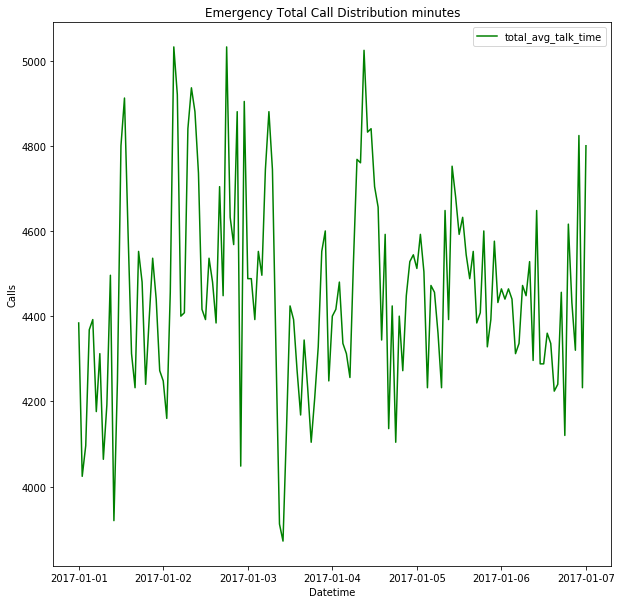

In [70]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.lineplot(x="datetime", y="total_avg_talk_time", data=ecas, label = 'total_avg_talk_time' , color='green')
plt.title("Emergency Total Call Distribution minutes")
plt.xlabel("Datetime")
plt.ylabel("Calls")
plt.legend()
plt.show()